# NIFTY 50 Stock Price Prediction

## Project Overview
This project implements a machine learning model to predict NIFTY 50 stock prices using Linear Regression. The model uses historical stock data with engineered features to forecast future prices.

## Author
**Alex J Mathew**

/tmp/ipython-input-3310372511.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty_data = yf.download('^NSEI', start='2010-01-01', end='2022-01-01')
[*********************100%***********************]  1 of 1 completed


Available columns: [('Close', '^NSEI'), ('High', '^NSEI'), ('Low', '^NSEI'), ('Open', '^NSEI'), ('Volume', '^NSEI')]
Mean Squared Error: 26844.42
Root Mean Squared Error: 163.84
Mean Absolute Error: 115.02
R-squared Score: 0.9962
Mean Absolute Percentage Error: 0.94%
Feature Importance:
           Feature   Importance
1             Year  3660.719047
0             Days    10.035321
3        DayOfYear     9.832638
2            Month     6.075342
4       Prev_Close     0.894351
5   Rolling_Mean_7     0.127221
6  Rolling_Mean_30     0.028109


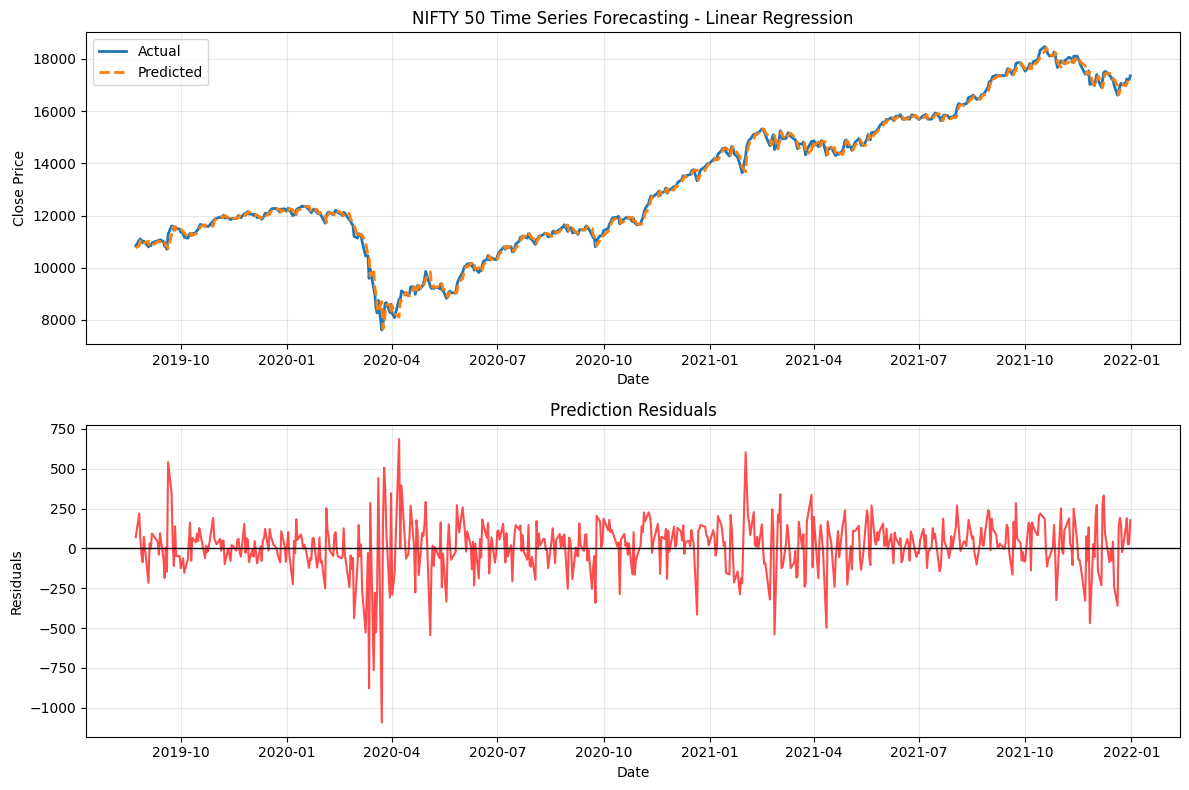

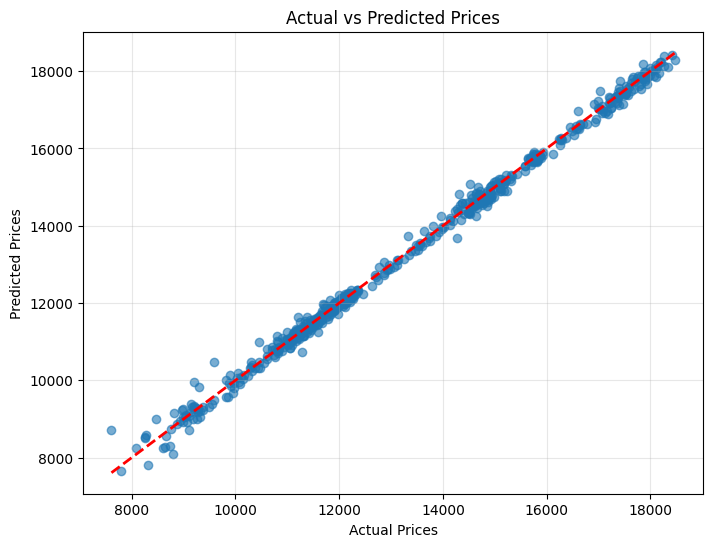

Model Coefficients:
Days: 10.0353
Year: -3660.7190
Month: -6.0753
DayOfYear: -9.8326
Prev_Close: 0.8944
Rolling_Mean_7: 0.1272
Rolling_Mean_30: -0.0281
Intercept: 7358120.8230


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

nifty_data = yf.download('^NSEI', start='2010-01-01', end='2022-01-01')
print("Available columns:", nifty_data.columns.tolist())

nifty_data = nifty_data[['Close']]
nifty_data = nifty_data.reset_index()

nifty_data['Days'] = (nifty_data['Date'] - nifty_data['Date'].min()).dt.days
nifty_data['Year'] = nifty_data['Date'].dt.year
nifty_data['Month'] = nifty_data['Date'].dt.month
nifty_data['DayOfYear'] = nifty_data['Date'].dt.dayofyear
nifty_data['Prev_Close'] = nifty_data['Close'].shift(1)
nifty_data['Rolling_Mean_7'] = nifty_data['Close'].rolling(window=7).mean()
nifty_data['Rolling_Mean_30'] = nifty_data['Close'].rolling(window=30).mean()

nifty_data = nifty_data.dropna()

split_index = int(len(nifty_data) * 0.8)
train = nifty_data.iloc[:split_index]
test = nifty_data.iloc[split_index:]

feature_columns = ['Days', 'Year', 'Month', 'DayOfYear', 'Prev_Close', 'Rolling_Mean_7', 'Rolling_Mean_30']

X_train = train[feature_columns]
y_train = train['Close'].squeeze()
X_test = test[feature_columns]
y_test = test['Close'].squeeze()

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared Score: {r2:.4f}')

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    # Reshape model.coef_ to be 1-dimensional
    'Importance': np.abs(model.coef_.reshape(-1))
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(test['Date'], y_test, label='Actual', linewidth=2)
plt.plot(test['Date'], y_pred, label='Predicted', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NIFTY 50 Time Series Forecasting - Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
residuals = y_test - y_pred
plt.plot(test['Date'], residuals, color='red', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Prediction Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True, alpha=0.3)
plt.show()

print("Model Coefficients:")
for feature, coef in zip(feature_columns, model.coef_.reshape(-1)):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")